# **TITANIC SURVIVAL PREDICTION**

In [ ]:
#importing data
from google.colab import files
titanic_upload = files.upload()

Saving tested.csv to tested (2).csv


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score



In [ ]:
#loading data
tit= pd.read_csv('tested.csv')
tit.head(12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
#no. of rows and columns in the dataset
tit.shape

(418, 12)

In [ ]:
#data statitics
tit.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
tit.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Handling missing **values**

In [ ]:
tit = tit.drop(columns='Cabin',axis=1)

In [ ]:
#replacing missing age values with mean value of age
tit['Age'].fillna(tit['Age'].mean(),inplace=True)

In [ ]:
tit['Fare'].fillna(tit['Fare'].mean(),inplace=True)

In [ ]:
tit.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
tit['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

**Visualising the data**

<Axes: xlabel='Survived', ylabel='count'>

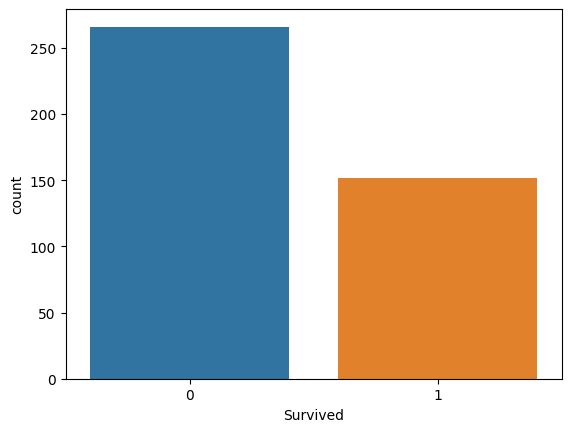

In [ ]:
sns.countplot(data= tit , x='Survived')

In [ ]:
tit['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

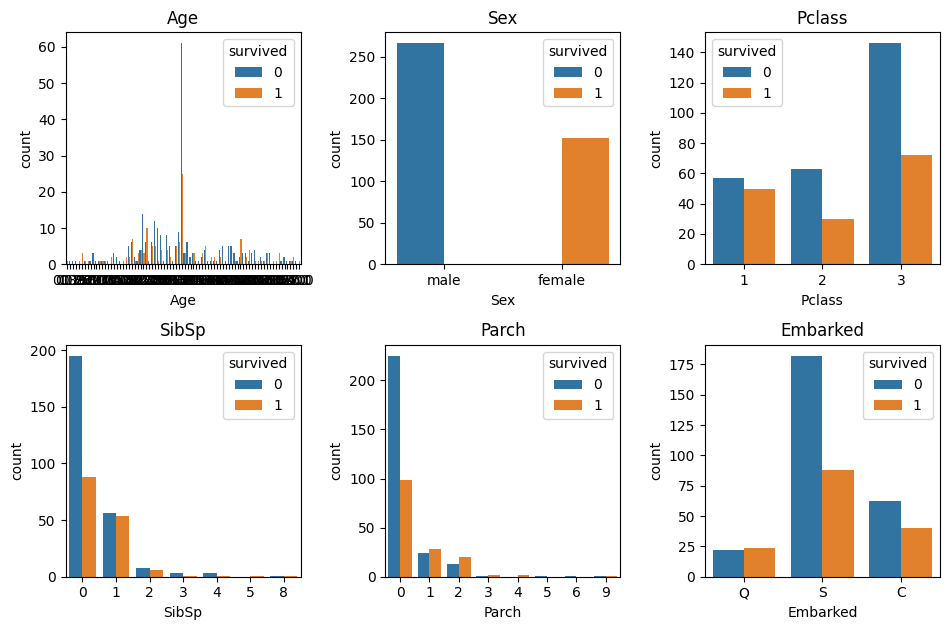

In [ ]:
cols = ['Age','Sex','Pclass','SibSp','Parch','Embarked']
n_rows = 2
n_cols = 3
fig,axs =plt.subplots(n_rows , n_cols , figsize = (n_cols * 3.2 , n_rows*3.2) )

for r in range(0, n_rows):
    for c in range(0,n_cols):

      i = r*n_cols + c
      ax =axs[r][c]
      sns.countplot(x=tit[cols[i]], hue = tit['Survived'], ax =ax)
      ax.set_title(cols[i])
      ax.legend(title='survived')

plt.tight_layout()



<Axes: xlabel='Pclass', ylabel='Survived'>

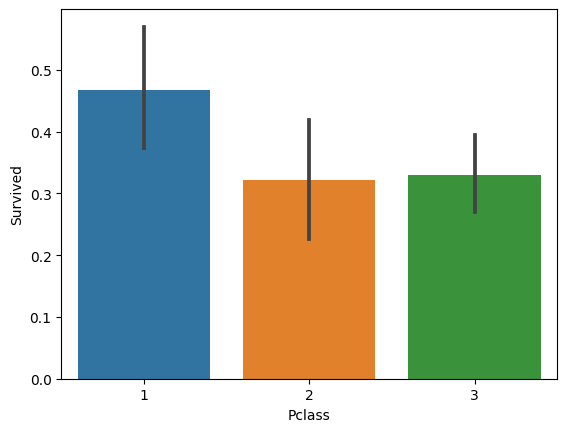

In [ ]:
sns.barplot(x='Pclass',y='Survived', data=tit)

In [ ]:
tit = tit.drop(columns=['PassengerId','Name','Ticket'])

In [ ]:

tit['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [ ]:
#encoding the categorical column values to numeric values
from sklearn.preprocessing import LabelEncoder


In [ ]:
le= LabelEncoder()

In [ ]:
tit['Sex']=le.fit_transform(tit['Sex'])

In [ ]:
tit['Embarked']=le.fit_transform(tit['Embarked'])

In [ ]:
print(tit)

     Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0           0       3    1  34.50000      0      0    7.8292         1
1           1       3    0  47.00000      1      0    7.0000         2
2           0       2    1  62.00000      0      0    9.6875         1
3           0       3    1  27.00000      0      0    8.6625         2
4           1       3    0  22.00000      1      1   12.2875         2
..        ...     ...  ...       ...    ...    ...       ...       ...
413         0       3    1  30.27259      0      0    8.0500         2
414         1       1    0  39.00000      0      0  108.9000         0
415         0       3    1  38.50000      0      0    7.2500         2
416         0       3    1  30.27259      0      0    8.0500         2
417         0       3    1  30.27259      1      1   22.3583         0

[418 rows x 8 columns]


In [ ]:
#separating features and target
x= tit.drop(columns=['Survived'],axis=1)
y= tit['Survived']

In [ ]:
print(x)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    1  34.50000      0      0    7.8292         1
1         3    0  47.00000      1      0    7.0000         2
2         2    1  62.00000      0      0    9.6875         1
3         3    1  27.00000      0      0    8.6625         2
4         3    0  22.00000      1      1   12.2875         2
..      ...  ...       ...    ...    ...       ...       ...
413       3    1  30.27259      0      0    8.0500         2
414       1    0  39.00000      0      0  108.9000         0
415       3    1  38.50000      0      0    7.2500         2
416       3    1  30.27259      0      0    8.0500         2
417       3    1  30.27259      1      1   22.3583         0

[418 rows x 7 columns]


In [ ]:
print(y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


Training and Testing Data


In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=21)

In [ ]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
26,1,0,22.0,0,1,61.9792,0
113,3,0,18.5,0,0,7.2833,1
402,1,0,22.0,0,1,59.4000,0
140,3,0,10.0,5,2,46.9000,2
212,2,1,17.0,0,0,73.5000,2


In [ ]:
print(x.shape,x_train.shape , x_test.shape)

(418, 7) (334, 7) (84, 7)


Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix

In [54]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print("Confusion Matrix: \n", confusion_matrix(y_test , y_pred))
print("Classification Repor: \n", classification_report(y_test,y_pred))


Confusion Matrix: 
 [[54  0]
 [ 0 30]]
Classification Repor: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        30

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
